Name: Aditi Kakade
Roll No.: 21102B0061
Branch: CMPN-B
Batch: 4

<ipython-input-14-0f12b266e37e>:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  facebook_data = pd.read_csv('facebook_combined.txt', delim_whitespace=True, header=None, names=['user_id', 'friend_id'])


Number of nodes: 4039
Number of edges: 88234


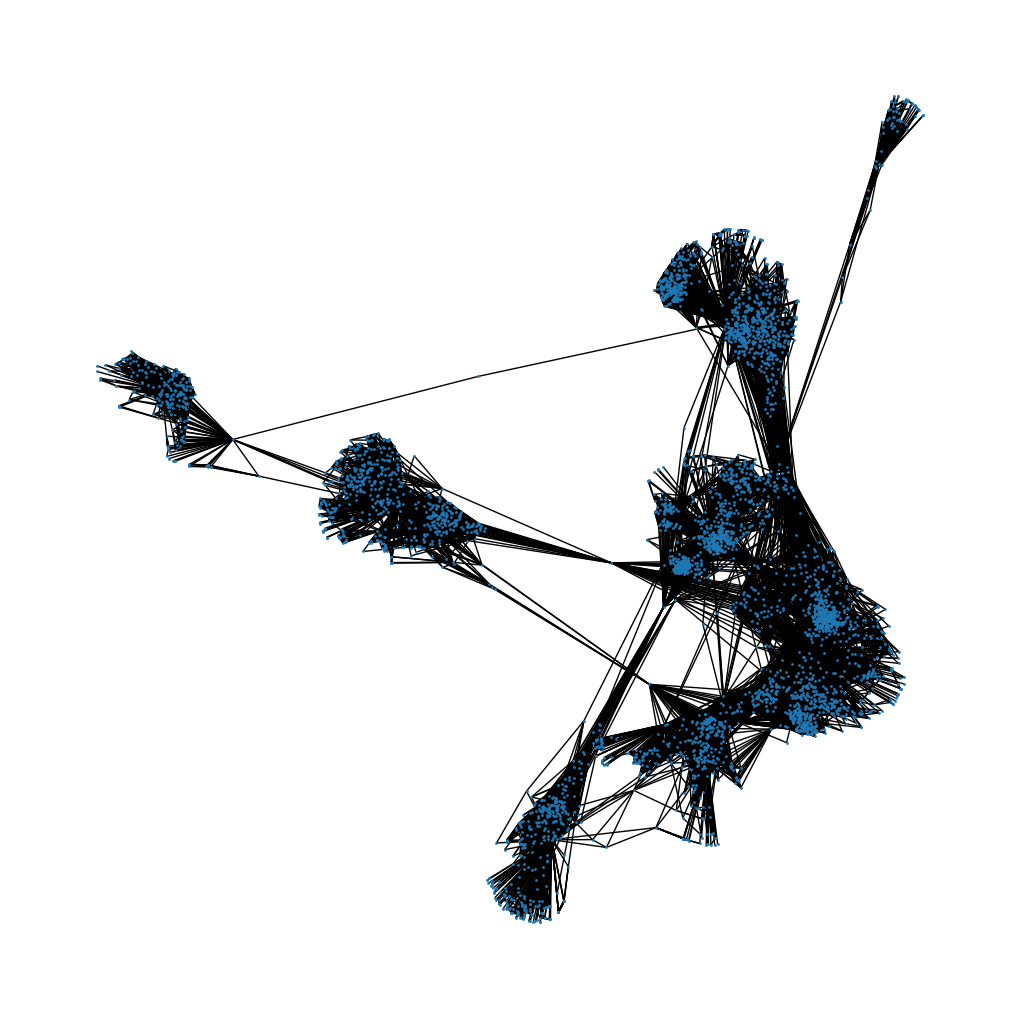

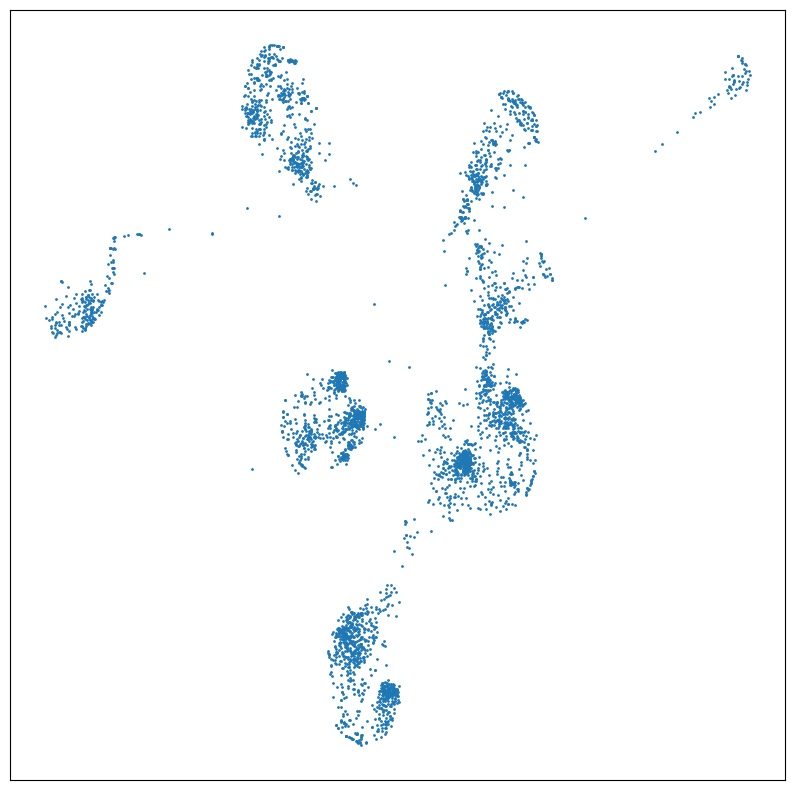

Silhouette Score for Facebook: -0.11032512606574217


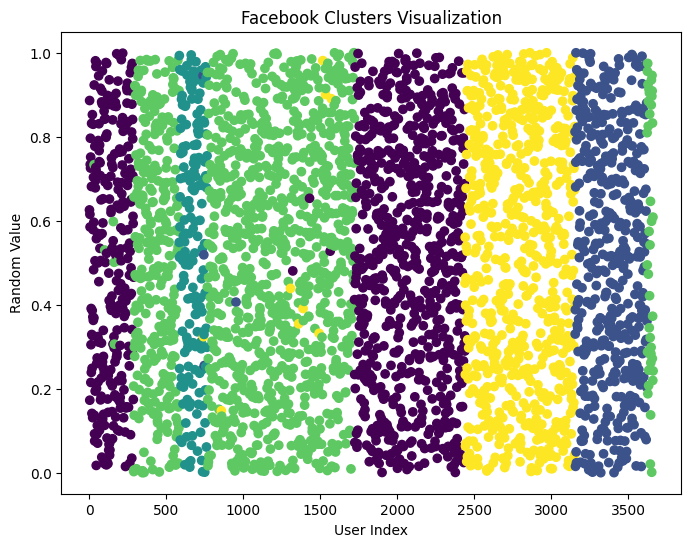

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score

facebook_data = pd.read_csv('facebook_combined.txt', delim_whitespace=True, header=None, names=['user_id', 'friend_id'])

num_users = facebook_data['user_id'].nunique()
adjacency_matrix_fb = np.zeros((num_users, num_users))

user_to_index = {user_id: index for index, user_id in enumerate(facebook_data['user_id'].unique())}

for _, row in facebook_data.iterrows():
    user_index = user_to_index.get(row['user_id']) # Use get method to avoid KeyError
    friend_index = user_to_index.get(row['friend_id']) # Use get method to avoid KeyError

    if user_index is not None and friend_index is not None: # Only create entry if both user and friend are in the dictionary
        adjacency_matrix_fb[user_index, friend_index] = 1
        adjacency_matrix_fb[friend_index, user_index] = 1

n_clusters_facebook = 5  # Experiment with this value
spectral_model_fb = SpectralClustering(n_clusters=n_clusters_facebook, affinity='precomputed')
labels_fb = spectral_model_fb.fit_predict(adjacency_matrix_fb)

!pip install networkx
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

graph = nx.Graph()

for user_id in facebook_data['user_id'].unique():
  graph.add_node(user_id)

for _, row in facebook_data.iterrows():
  user_id = row['user_id']
  friend_id = row['friend_id']
  graph.add_edge(user_id, friend_id)

print(f"Number of nodes: {graph.number_of_nodes()}")
print(f"Number of edges: {graph.number_of_edges()}")

plt.figure(figsize=(10, 10))  # Adjust figure size as needed
nx.draw(graph, node_size=1, with_labels=False)  # Set node_size to 1 and remove labels for clarity
plt.show()

# Additional NetworkX visualization with a spring layout
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(graph)  # You can try different layouts here
nx.draw_networkx_nodes(graph, pos, node_size=1)
plt.show()

silhouette_fb = silhouette_score(adjacency_matrix_fb, labels_fb)
print(f'Silhouette Score for Facebook: {silhouette_fb}')

plt.figure(figsize=(8, 6))
plt.scatter(range(num_users), np.random.rand(num_users), c=labels_fb, cmap='viridis')
plt.title('Facebook Clusters Visualization')
plt.xlabel('User Index')
plt.ylabel('Random Value')
plt.show()
